In [18]:
import torch
from torch import nn
from torch.nn import functional as F    
from torch.utils.data import DataLoader, Dataset, ConcatDataset

from torchvision import transforms
from torchvision import io
from torchvision.transforms import v2

from pathlib import Path

import matplotlib.pyplot as plt

In [ ]:
print(f"PyTorch version: {torch.__version__}")


PyTorch version: 2.5.1


NameError: name 'torchvision' is not defined

### Exploring torchvision transforms

torch.Size([1, 1024, 1024])


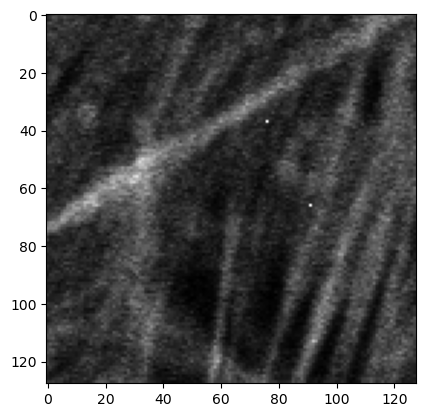

In [16]:
file_path = Path().resolve().parent / "data" / "preprocessed" / "confocal" / "confocal-actin-confocal-highsnr" /"confocal-actin-confocal-highsnr-0.png"  
im_tst = io.decode_image(file_path, mode=io.ImageReadMode.GRAY)
print(im_tst.shape)
plt.imshow(im_tst[0], cmap='gray')

transform = transforms.RandomCrop(size=(128,128))

plt.imshow(transform(im_tst)[0],cmap='gray')



In [ ]:
# define transforms for dataset
transform_confocal = v2.Compose([
    v2.ToImage(),
    v2.RandomCrop(size=256,padding=1024,padding_mode="reflect"),
])

transform_nucleus = v2.Compose([
    v2.ToImage(),
    v2.RandomCrop(size=256,padding=1536,padding_mode="reflect"),
])

transform = v2.Compose([
    v2.ToImage(),
])

In [ ]:
# define custom image dataset for N2n
class N2NImageDataset(Dataset):
    def __init__(self,root: Path, dataset: str, subdataset: str, transform):
        super().__init__()
        self.root = root
        dataset_dir = root / "data" / "preprocessed" / dataset
        self.image_dir = dataset_dir / f"{dataset}-{subdataset}-lowsnr" # treat lowsnr as input image
        self.target_dir = dataset_dir / f"{dataset}-{subdataset}-highsnr" # treat highsnr as target image
    
    def __len__(self):
        return sum(1 for path in self.image_dir.iterdir() if path.is_file()) # count number of images in directory
    
    def __getitem__(self, index):
        img_index = (index // 8 ) 
        image_patch = transform(io.decode_image(self.image_dir / f"-{img_index}.png"))
        target_patch = transform(io.decode_image(self.target_dir / f"-{img_index}.png"))

